# Introducción al aprendizaje automático con scikit-learn

En los últimos tiempos habrás oído hablar de _machine learning_, _deep learning_, _reinforcement learning_, muchas más cosas que contienen la palabra _learning_ y, por supuesto, _Big Data_. Con los avances en capacidad de cálculo de los últimos años y la popularización de lenguajes de alto nivel, hemos entrado de lleno en la fiebre de hacer que las máquinas aprendan. En esta clase veremos cómo utilizar el paquete `scikit-learn` de Python para poder crear modelos predictivos a partir de nuestros datos de una manera rápida y sencilla.

En primer lugar vamos a probar con un ejemplo muy sencillo: ajustar una recta a unos datos. Esto difícilmente se puede llamar _machine learning_, pero nos servirá para ver cómo es la forma de trabajar con `scikit-learn`, cómo se entrenan los modelos y cómo se calculan las predicciones.

En primer lugar fabricamos unos datos distribuidos a lo largo de una recta con un poco de ruido:

El proceso para usar `scikit-learn` es el siguiente:

1. Separar los datos en matriz de características `features` y variable a predecir `y`
2. Seleccionar el modelo
3. Elegir los hiperparámetros
4. Ajustar o entrenar el modelo (`model.fit`)
5. Predecir con datos nuevos (`model.predict`)

<div class="alert alert-info">Tenemos que hacer este `reshape` para transformar nuestro vector en una matriz de columnas. Rara vez tendremos que repetir este paso, puesto que en la práctica siempre tendremos varias variables.</div>

Para calcular el error, en el módulo `sklearn.metrics` tenemos varias funciones útiles:

Y ahora predecimos con datos nuevos:

¡Y ya está! Lo básico de `scikit-learn` está aquí. Lo próximo será usar diferentes tipos de modelos y examinar con rigor su rendimiento para poder seleccionar el que mejor funcione para nuestros datos.

## Introducción rápida al aprendizaje automático

En aprendizaje automático tenemos dos tipos de problemas:

* **Aprendizaje supervisado**, cuando tengo datos _etiquetados_, es decir: conozco la variable a predecir de un cierto número de observaciones. Pasándole esta información al algoritmo, este será capaz de predecir dicha variable cuando reciba observaciones nuevas. Dependiendo de la naturaleza de la variable a predecir, tendremos a su vez:
  - **Regresión**, si es continua (como el caso anterior), o
  - **Clasificación**, si es discreta o categórica (sí/no, color de ojos, etc)
* **Aprendizaje no supervisado**, cuando no tenemos datos _etiquetados_ y por tanto no tengo ninguna información _a priori_. En este caso usaremos los algoritmos para descubrir patrones en los datos y agruparlos, pero tendremos que manualmente inspeccionar el resultado después y ver qué sentido podemos darle a esos grupos.

En función de la naturaleza de nuestro problema, `scikit-learn` proporciona una gran variedad de algoritmos que podemos elegir.

![Machine Learning map](../images/ml_map.png)

## Clasificación

En `scikit-learn` tenemos disponibles muchos datasets clásicos de ejemplo que podemos utilizar para practicar. Uno de ellos es el dataset MNIST, que consiste en imágenes escaneadas de números escritos a mano por funcionarios de los EEUU. Para cargarlo, importamos la función correspondiente de `sklearn.datasets`:

Ya tenemos los datos separados en matriz de características y vector de predicción. En este caso, tendré 64 = 8x8 características (un valor numérico por cada pixel de la imagen) y mi variable a predecir será el número en sí.

Siempre que se hace aprendizaje supervisado, se ha de dividir el dataset en una parte para entrenamiento y otra para test (incluso a veces hay una partición más para validación)

In [ ]:
# X_train, X_test, Y_train, Y_test =

In [27]:
# preserve
X_train.shape, Y_train.shape

((1347, 64), (1347,))

In [28]:
# preserve
X_test.shape, Y_test.shape

((450, 64), (450,))

Para visualizar estas imágenes tendremos que hacer un `.reshape`:

Ten en cuenta que nosotros sabemos qué número es cada imagen porque somos humanos y podemos leerlas. El ordenador lo sabe porque están etiquetadas, pero ¿qué pasa si viene una imagen nueva? Para eso tendremos que construir un modelo de clasificación. En este caso aplicaremos la regresión logística

In [ ]:
# Inicializamos el modelo

In [ ]:
# Lo entrenamos

Y una vez que hemos ajustado el modelo, comprobemos cuáles son sus predicciones usando los mismos datos de entrenamiento:

In [ ]:
# Vemos los resultados para los datos de test

De nuevo usamos `sklearn.metrics` para medir la eficacia del algoritmo:

¡Parece que hemos acertado prácticamente todas! Más tarde volveremos sobre este porcentaje de éxito, que bien podría ser engañoso. De momento, representemos otra medida de éxito que es la matriz de confusión:

## _Clustering_ y reducción de dimensionalidad

Una vez que hemos visto los dos tipos de problemas supervisados, vamos a ver cómo se trabajan los problemas no supervisados. En primer lugar vamos a fabricar dos nubes de puntos usando la función `make_blobs`:

In [61]:
# preserve
# https://github.com/amueller/scipy-2016-sklearn/blob/master/notebooks/05%20Supervised%20Learning%20-%20Classification.ipynb
from sklearn.datasets import make_blobs

In [62]:
# preserve
features, labels = make_blobs(centers=[[6, 0], [2, -1]], random_state=0)
features.shape

(100, 2)

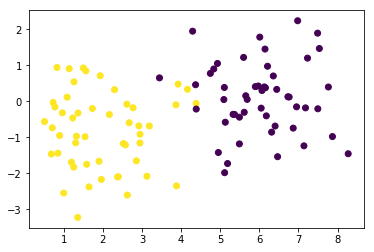

In [63]:
# preserve
plt.scatter(features[:, 0], features[:, 1], c=labels)

Hemos creado dos grupos y algunos puntos se solapan, pero ¿qué pasaría si no tuviésemos esta información visual? Vamos a emplear un modelo de clustering para agrupar los datos: en este caso KMeans

Observa que por defecto tenemos 8 clusters. Veamos qué ocurre:

Ahora **no** pasamos la información de las etiquetas al algoritmo a la hora de entrenar. En la práctica por supuesto no la tendremos.

Y ahora preparamos el código para representar todas las regiones:

In [77]:
# preserve
xmin, xmax = features[:, 0].min(), features[:, 0].max()
ymin, ymax = features[:, 1].min(), features[:, 1].max()

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax),
    np.linspace(ymin, ymax)
)

mesh = np.c_[xx.ravel(), yy.ravel()]
mesh

array([[ 0.50874241, -3.22340315],
       [ 0.66713041, -3.22340315],
       [ 0.82551842, -3.22340315],
       ..., 
       [ 7.95297862,  2.2408932 ],
       [ 8.11136662,  2.2408932 ],
       [ 8.26975462,  2.2408932 ]])

In [ ]:
# http://pybonacci.org/2015/01/14/introduccion-a-machine-learning-con-python-parte-1/

Si lo metemos todo en una función interactiva:

In [ ]:
# preseve

### Reducción de dimensionalidad

Vamos a rescatar nuestro dataset de los dígitos y tratar de visualizarlo en dos dimensiones, lo que se conoce como _reducción de dimensionalidad_.

Y ahora proyectamos los datos usando `.transform`:

## Ejercicio

1. Visualiza el dataset de las flores (`load_iris`) utilizando las funciones que tienes más abajo. ¿Hay alguna forma clara de separar las tres especies de flores?
2. Separa el dataset en matriz de características `features` y vector de etiquetas `labels`. Conviértelos a arrays de NumPy usando `.as_matrix()`.
3. Reduce la dimensionalidad del dataset a 2 usando `sklearn.manifold.Isomap` o `sklearn.decomposition.PCA` y usa un algoritmo de clustering con 3 clusters. ¿Se parecen los clusters que aparecen a los grupos originales?
4. Predice el tipo de flor usando un algoritmo de clasificación. Visualiza la matriz de confusión. ¿Cuál es el porcentaje de aciertos del algoritmo? ¿Es más certero en algún tipo de flor en concreto? ¿Concuerda esto con lo que pensaste en el apartado 1?

In [84]:
# preserve
import pandas as pd

def load_iris_df():
    from sklearn.datasets import load_iris

    iris = load_iris()
    features, labels = iris.data, iris.target

    df = pd.DataFrame(features, columns=iris.feature_names)
    df["species"] = pd.Categorical.from_codes(iris.target, categories=iris.target_names)

    #df = df.replace({'species': {0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]}})

    return df

iris_df = load_iris_df()

In [85]:
# preserve
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


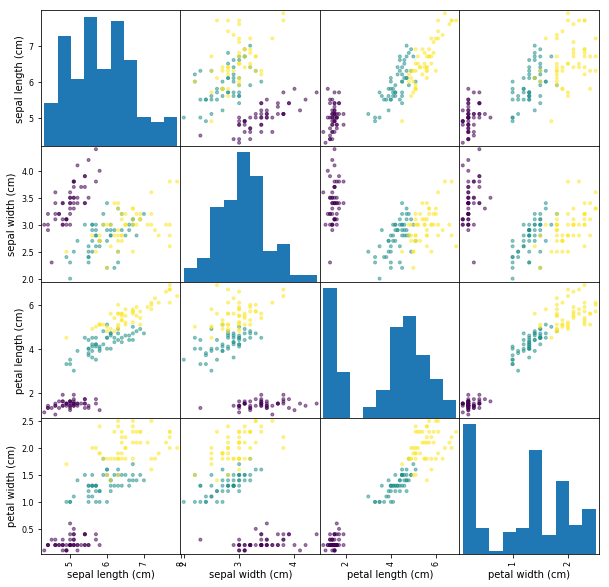

In [88]:
# preserve
_ = pd.tools.plotting.scatter_matrix(iris_df, c=iris_df["species"].cat.codes, figsize=(10, 10))

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.